<a href="https://colab.research.google.com/github/heidaralavi/Fetch-daily-product/blob/main/Data%20Gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/heidaralavi/Fetch-daily-product.git

Cloning into 'Fetch-daily-product'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 98 (delta 29), reused 71 (delta 11), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
from typing_extensions import Concatenate
from os import walk
mypaths= ['/content/Fetch-daily-product/1400','/content/Fetch-daily-product/1399','/content/Fetch-daily-product/1398']
myfiles=[]
for mypath in mypaths:
  for root, dirs, files in os.walk(mypath):
    for f in files:
      myfiles.append(root+'/'+f)
      #break #only one loop needed
myfiles,len(myfiles)

(['/content/Fetch-daily-product/1400/5-Mordad.xlsx',
  '/content/Fetch-daily-product/1400/11-Bahman.xlsx',
  '/content/Fetch-daily-product/1400/10-Dey.xlsx',
  '/content/Fetch-daily-product/1400/9-Azar.xlsx',
  '/content/Fetch-daily-product/1400/2-Ordibehesht.xlsx',
  '/content/Fetch-daily-product/1400/12-Esfand.xlsx',
  '/content/Fetch-daily-product/1400/8-Aban.xlsx',
  '/content/Fetch-daily-product/1400/7-Mehr.xlsx',
  '/content/Fetch-daily-product/1400/1-Farvardin.xlsx',
  '/content/Fetch-daily-product/1400/3-Khordad.xlsx',
  '/content/Fetch-daily-product/1400/6-Shahrivar.xlsx',
  '/content/Fetch-daily-product/1400/4-Tir.xlsx',
  '/content/Fetch-daily-product/1399/5-Mordad.xlsx',
  '/content/Fetch-daily-product/1399/11-Bahman.xlsx',
  '/content/Fetch-daily-product/1399/10-Dey.xlsx',
  '/content/Fetch-daily-product/1399/9-Azar.xlsx',
  '/content/Fetch-daily-product/1399/2-Ordibehesht.xlsx',
  '/content/Fetch-daily-product/1399/12-Esfand.xlsx',
  '/content/Fetch-daily-product/1399/8-A

In [4]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [9]:
product =[]
for f in myfiles:
    xl = pd.ExcelFile(f)
    sheet_names=xl.sheet_names
    for sheet_name in sheet_names:
        df= pd.read_excel(f, sheet_name=sheet_name , header = None)
        df = trim_all_columns(df)
        date_row,date_col=np.where(df.values == 'تاریخ گزارش:')
        row,col = np.where(df.values == 'روز')
        tolid_row,tolid_col = np.where(df.values == 'میزان تولید واقعي')
        filter_row,filter_col = np.where(df.values == 'ميزان توليد فيلتر ديسكها')
        grate_feed_row,grate_feed_col = np.where(df.values == 'ميزان فيد ورودي به تراولينگ گريت')
        G_row,G_col = np.where(df.values == 'ميزان مواد ريزشي از تراولينگ به سمت ديسكها (920BC3)')
        #print([df.values[date_row,date_col+4][0],df.values[date_row,date_col+2][0],df.values[tolid_row,col][0],df.values[filter_row,col][0]])
        product.append([df.values[date_row,date_col+4][0],df.values[date_row,date_col+2][0],
                        df.values[tolid_row,col][0],df.values[filter_row,col][0],
                        df.values[grate_feed_row,col][0],df.values[G_row,col][0],])
        break

In [24]:
ddf=pd.DataFrame(product,columns=['date','jdate','M+L+E(ton/day)','H(ton/day)','A(ton/day)','G(ton/day)'])

In [25]:
ddf = ddf.sort_values(by="date")
ddf.reset_index(inplace=True,drop=True)

In [26]:
ddf

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
0,2019-03-21,1398/01/01,11131,860.78,12131.00,551.00
1,2019-04-21,1398/02/01,12254,760.39,12978.50,512.00
2,2019-05-22,1398/03/01,12174,533.99,12779.80,526.00
3,2019-06-22,1398/04/01,10703,650.75,11665.50,464.00
4,2019-07-23,1398/05/01,2122,0.00,2840.72,119.00
5,2019-08-23,1398/06/01,0,0.00,0.00,0.00
6,2019-09-23,1398/07/01,4306,0.14,5370.30,0.00
7,2019-10-23,1398/08/01,11952,961.38,12298.30,324.00
8,2019-11-22,1398/09/01,11768,348.02,12637.80,388.00
9,2019-12-22,1398/10/01,12192,1060.35,12935.70,447.02


In [27]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            36 non-null     datetime64[ns]
 1   jdate           36 non-null     object        
 2   M+L+E(ton/day)  36 non-null     int64         
 3   H(ton/day)      36 non-null     float64       
 4   A(ton/day)      36 non-null     float64       
 5   G(ton/day)      36 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.8+ KB


In [28]:
ddf[ddf.values == '1400/07/26']

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)


In [32]:
ddf=ddf[ddf['M+L+E(ton/day)']>10000]
ddf['landa']=(ddf.iloc[:,4]-ddf.iloc[:,3]-ddf.iloc[:,5])/(ddf.iloc[:,2])

In [33]:
ddf.describe()

,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,11693.478261,733.992174,12689.970000,465.488261,0.983054
std,646.231303,316.435812,712.709054,254.400814,0.031008
min,10618.000000,36.990000,10799.500000,0.000000,0.921429
25%,11401.500000,557.905000,12410.270000,255.470000,0.962677
50%,11686.000000,834.950000,12892.200000,502.980000,0.983675
75%,12063.000000,959.500000,13002.750000,675.015000,1.005719
max,13201.000000,1272.040000,14193.500000,866.030000,1.036293


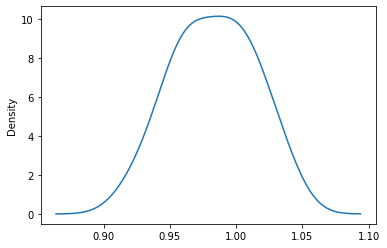

In [31]:
ddf['landa'].plot(kind='kde')